In [1]:
import pandas as pd
import numpy as np
!pip install country_converter >nul 2>&1
import country_converter as coco
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
import nltk

%matplotlib inline

In [2]:
df = pd.read_csv('data_science_salaries.csv')
df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


In [3]:
%%html
<div>
    
    <div class='tableauPlaceholder' id='viz1671600753284' style='position: relative'>
        
    <noscript>
        <a href='#'>
            <img alt='Dashboard ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;AI&#47;AISalaryAnalysis&#47;Dashboard&#47;1_rss.png' style='border: none' />
        </a>
    </noscript>
    
    <object class='tableauViz'  style='display:none;'>
        <param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> 
        <param name='embed_code_version' value='3' /> <param name='site_root' value='' />
        <param name='name' value='AISalaryAnalysis&#47;Dashboard' />
        <param name='tabs' value='no' />
        <param name='toolbar' value='yes' />
        <param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;AI&#47;AISalaryAnalysis&#47;Dashboard&#47;1.png' /> 
        <param name='animate_transition' value='yes' />
        <param name='display_static_image' value='yes' />
        <param name='display_spinner' value='yes' />
        <param name='display_overlay' value='yes' />
        <param name='display_count' value='yes' />
        <param name='language' value='en-US' />
    </object>
    </div>  
    
    <script type='text/javascript'>
        var divElement = document.getElementById('viz1671600753284');                    
        var vizElement = divElement.getElementsByTagName('object')[0];                   
        if ( divElement.offsetWidth > 800 )
                            { vizElement.style.width='1100px';vizElement.style.height='2227px';} 
        else if ( divElement.offsetWidth > 500 ) 
                            { vizElement.style.width='1100px';vizElement.style.height='2227px';} 
        else { vizElement.style.width='100%';vizElement.style.height='1677px';}                    
        var scriptElement = document.createElement('script');                 
        scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';       
        vizElement.parentNode.insertBefore(scriptElement, vizElement);             
    </script>
    
</div>


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           6599 non-null   object
 1   experience_level    6599 non-null   object
 2   employment_type     6599 non-null   object
 3   work_models         6599 non-null   object
 4   work_year           6599 non-null   int64 
 5   employee_residence  6599 non-null   object
 6   salary              6599 non-null   int64 
 7   salary_currency     6599 non-null   object
 8   salary_in_usd       6599 non-null   int64 
 9   company_location    6599 non-null   object
 10  company_size        6599 non-null   object
dtypes: int64(3), object(8)
memory usage: 567.2+ KB


In [6]:
df.describe(include=[object])

,job_title,experience_level,employment_type,work_models,employee_residence,salary_currency,company_location,company_size
count,6599,6599,6599,6599,6599,6599,6599,6599
unique,132,4,4,3,87,22,75,3
top,Data Engineer,Senior-level,Full-time,On-site,United States,USD,United States,Medium
freq,1307,4105,6552,3813,5305,5827,5354,5860


In [7]:
df.columns

Index(['job_title', 'experience_level', 'employment_type', 'work_models',
       'work_year', 'employee_residence', 'salary', 'salary_currency',
       'salary_in_usd', 'company_location', 'company_size'],
      dtype='object')

In [8]:
df.dtypes

job_title             object
experience_level      object
employment_type       object
work_models           object
work_year              int64
employee_residence    object
salary                 int64
salary_currency       object
salary_in_usd          int64
company_location      object
company_size          object
dtype: object

In [9]:
df.isnull().sum()

job_title             0
experience_level      0
employment_type       0
work_models           0
work_year             0
employee_residence    0
salary                0
salary_currency       0
salary_in_usd         0
company_location      0
company_size          0
dtype: int64

In [10]:
df.sum

<bound method DataFrame.sum of                      job_title experience_level employment_type work_models  \
0                Data Engineer        Mid-level       Full-time      Remote   
1                Data Engineer        Mid-level       Full-time      Remote   
2               Data Scientist     Senior-level       Full-time      Remote   
3               Data Scientist     Senior-level       Full-time      Remote   
4                 BI Developer        Mid-level       Full-time     On-site   
...                        ...              ...             ...         ...   
6594        Staff Data Analyst      Entry-level        Contract      Hybrid   
6595        Staff Data Analyst  Executive-level       Full-time     On-site   
6596  Machine Learning Manager     Senior-level       Full-time      Hybrid   
6597             Data Engineer        Mid-level       Full-time      Hybrid   
6598            Data Scientist     Senior-level       Full-time     On-site   

      work_year empl

In [11]:
df.duplicated().sum()

0

In [12]:
# Categorical columns distribution
categorical_cols = ['job_title', 'experience_level', 'employment_type', 'work_models', 'employee_residence', 'company_location', 'company_size']
for col in categorical_cols:
    print(df[col].value_counts())

job_title
Data Engineer                1307
Data Scientist               1243
Data Analyst                  910
Machine Learning Engineer     629
Analytics Engineer            246
                             ... 
Deep Learning Researcher        1
Power BI Developer              1
Marketing Data Scientist        1
AI Product Manager              1
Sales Data Analyst              1
Name: count, Length: 132, dtype: int64
experience_level
Senior-level       4105
Mid-level          1675
Entry-level         565
Executive-level     254
Name: count, dtype: int64
employment_type
Full-time    6552
Contract       19
Part-time      16
Freelance      12
Name: count, dtype: int64
work_models
On-site    3813
Remote     2561
Hybrid      225
Name: count, dtype: int64
employee_residence
United States     5305
United Kingdom     401
Canada             241
Germany             71
India               70
                  ... 
Georgia              1
Israel               1
Qatar                1
Peru        

In [13]:
#Disable scientific notation in pandas
pd.set_option('display.float_format', '{:.2f}'.format)

# Numerical columns summary without scientific notation
print(df[['salary', 'salary_in_usd']].describe())

           salary  salary_in_usd
count     6599.00        6599.00
mean    179283.26      145560.56
std     526372.24       70946.84
min      14000.00       15000.00
25%      96000.00       95000.00
50%     140000.00      138666.00
75%     187500.00      185000.00
max   30400000.00      750000.00


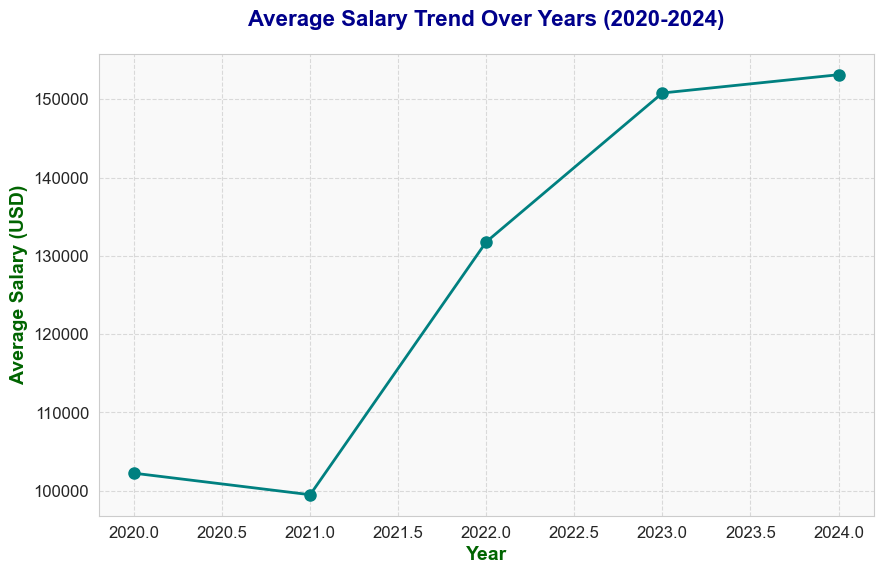

In [14]:
#Average salary trend over the years
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))

# Plot the salary trend with line and marker styles 
df.groupby('work_year')['salary_in_usd'].mean().plot(kind='line', marker='o', markersize=8, linestyle='-', linewidth=2, color='teal')

# Add title and labels 
plt.title('Average Salary Trend Over Years (2020-2024)', fontsize=16, fontweight='bold', color='darkblue', pad=20)
plt.ylabel('Average Salary (USD)', fontsize=14, fontweight='bold', color='darkgreen')
plt.xlabel('Year', fontsize=14, fontweight='bold', color='darkgreen')

# Customize ticks 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines 
plt.grid(True, which='both', linestyle='--', alpha=0.7)

# Add background color
plt.gca().set_facecolor('#f9f9f9')

# Show the plot
plt.show()

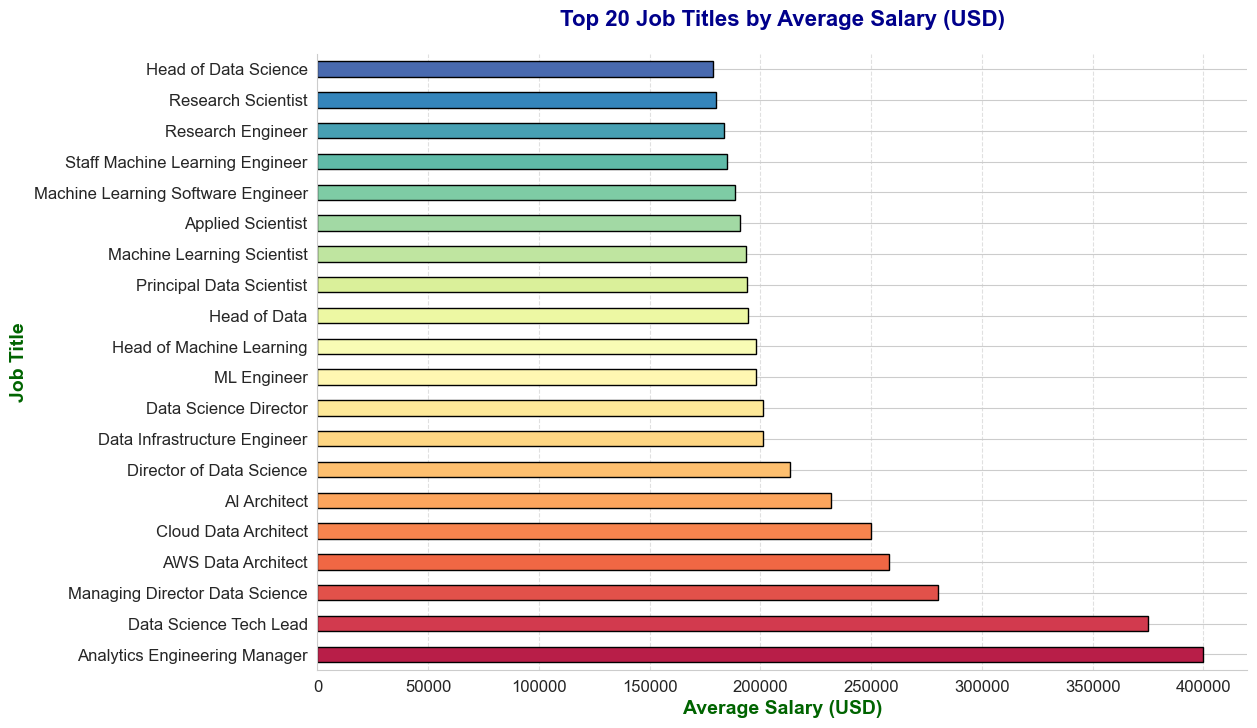

In [15]:
# Calculate the top 20 job titles by average salary
top_20_jobs = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(20)


# color palette
colors = sns.color_palette("Spectral", len(top_20_jobs))

# Create the plot 
plt.figure(figsize=(12, 8))
top_20_jobs.plot(kind='barh', color=colors, edgecolor='black')

# Title and labels 
plt.title('Top 20 Job Titles by Average Salary (USD)', fontsize=16, fontweight='bold', color='darkblue', pad=20)
plt.xlabel('Average Salary (USD)', fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel('Job Title', fontsize=14, fontweight='bold', color='darkgreen')

# Adding gridlines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Rotate x-axis labels for better readability and layout
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Remove top and right spines
sns.despine()

# Show the plot
plt.show()


In [17]:
#Top 20  Job Titles by Value Count
colors = ['#f5f5f6','#bebebe','#415a8a','#2c4d8a']
top20_job_titles = df['job_title'].value_counts()[:20]

# Bar plot
fig = px.bar(
    x=top20_job_titles.index, 
    y=top20_job_titles.values, 
    text=top20_job_titles.values, 
    title='Top 20 Job Titles',
    color=top20_job_titles.index,  
    color_discrete_sequence=colors 
)

fig.update_layout(
    xaxis_title="Job Designations", 
    yaxis_title="Count"
)

fig.show(renderer='iframe_connected')


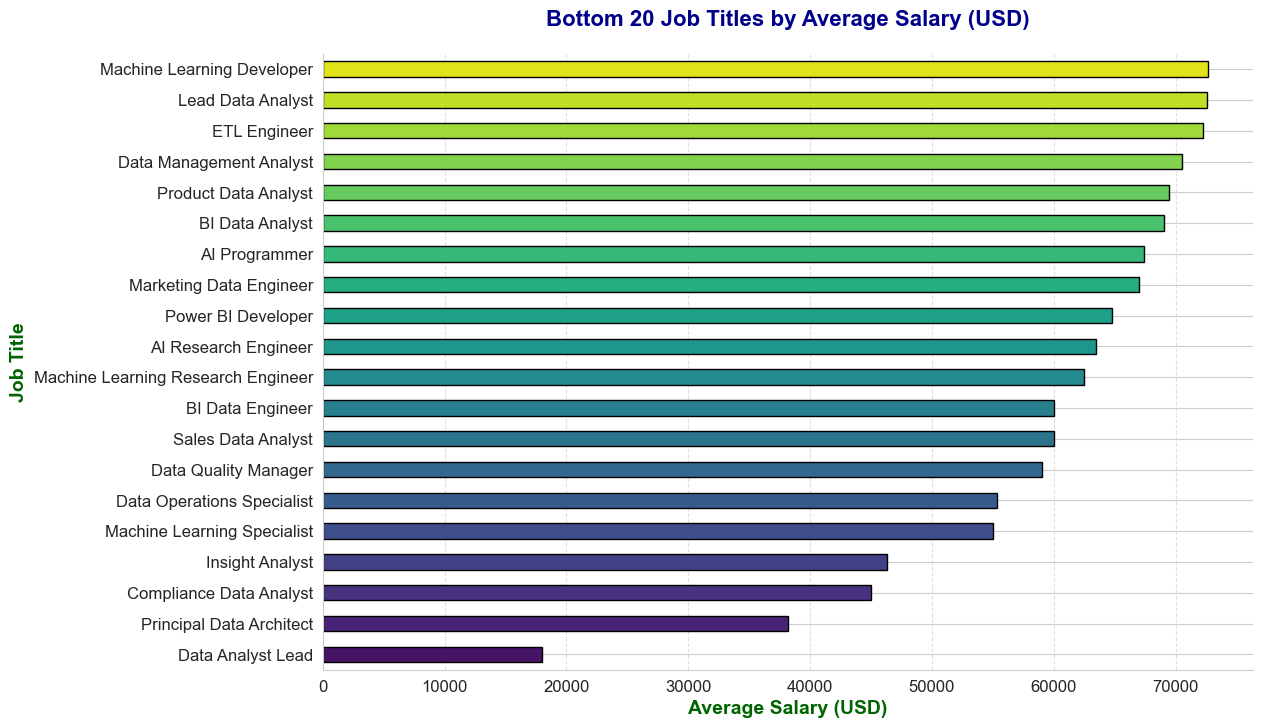

In [18]:
# Calculate the bottom 20 job titles by average salary
bottom_20_jobs = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=True).head(20)

colors = sns.color_palette("viridis", len(bottom_20_jobs))

# Create the plot
plt.figure(figsize=(12, 8))
bottom_20_jobs.plot(kind='barh', color=colors, edgecolor='black')

# Correct title and labels 
plt.title('Bottom 20 Job Titles by Average Salary (USD)', fontsize=16, fontweight='bold', color='darkblue', pad=20)
plt.xlabel('Average Salary (USD)', fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel('Job Title', fontsize=14, fontweight='bold', color='darkgreen')

# Adding gridlines 
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Adjust axis tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Remove top and right spines 
sns.despine()

# Show the plot
plt.show()

In [19]:
#Lets see where the employees are situated
country = coco.convert(names = df['employee_residence'], to = "ISO3")
df['employee_residence'] = country

colors = ['#f5f5f6', '#bebebe', '#415a8a', '#2c4d8a']

residence = df['employee_residence'].value_counts()

fig = px.choropleth(
    locations=residence.index, 
    locationmode="ISO-3",  
    color=residence.values,
    title='Employee Location On Map',
    color_continuous_scale=colors  
)

fig.show(renderer='iframe_connected')

In [20]:
#Top 10 Locations of Employees
colors = ['#2c4d8a', '#f5f5f6', '#bebebe', '#415a8a']

top_10_emp_locations = residence[:10]


fig = px.bar(
    x=top_10_emp_locations.index, 
    y=top_10_emp_locations.values, 
    color=top_10_emp_locations.index, 
    text=top_10_emp_locations.values,
    title='Top 10 Locations of Employees',
    color_discrete_sequence=colors
)

fig.update_layout(
    xaxis_title="Location of Employees", 
    yaxis_title="Count"
)

fig.show(renderer='iframe_connected')


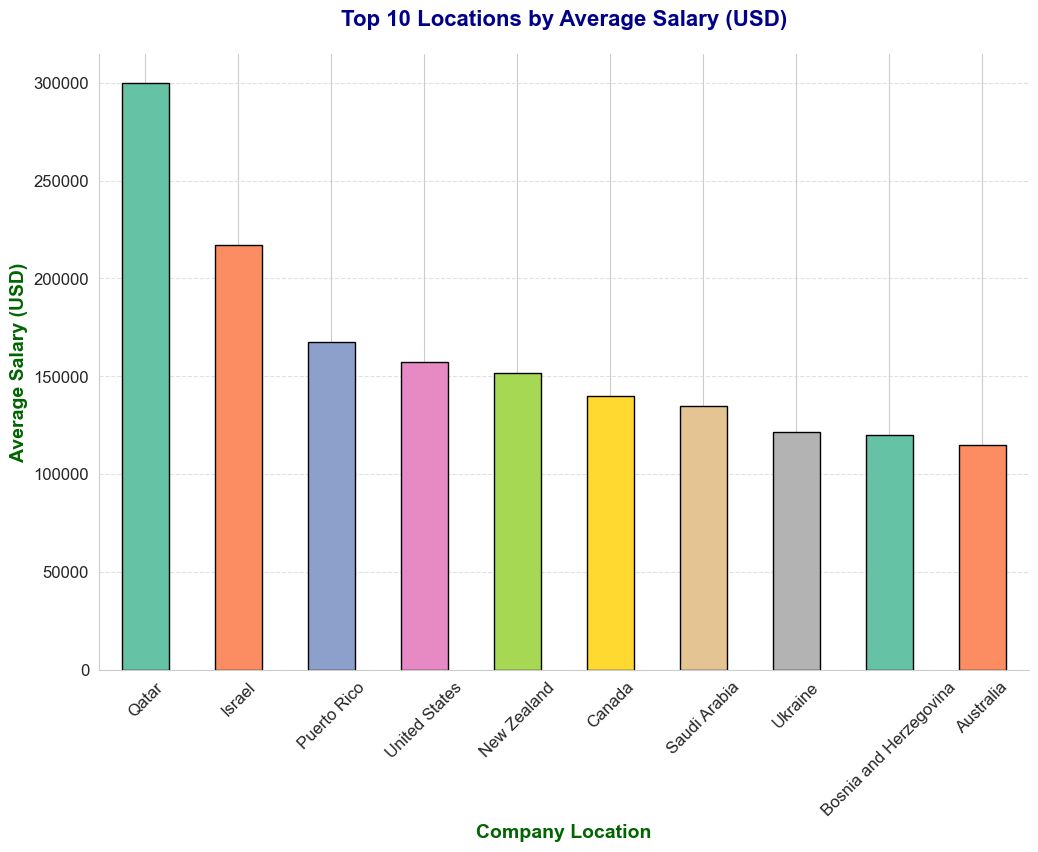

In [21]:
#Top 10 Locations by Average Salary
sns.set_style("whitegrid")

plt.figure(figsize=(12, 8))
top_10_locations = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).head(10)

# Use a colorful palette
colors = sns.color_palette("Set2", len(top_10_locations))

top_10_locations.plot(kind='bar', color=colors, edgecolor='black')

# Add title and labels 
plt.title('Top 10 Locations by Average Salary (USD)', fontsize=16, fontweight='bold', color='darkblue', pad=20)
plt.xlabel('Company Location', fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel('Average Salary (USD)', fontsize=14, fontweight='bold', color='darkgreen')

# Add gridlines 
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Remove top and right spines 
sns.despine()

# Show the plot
plt.show()


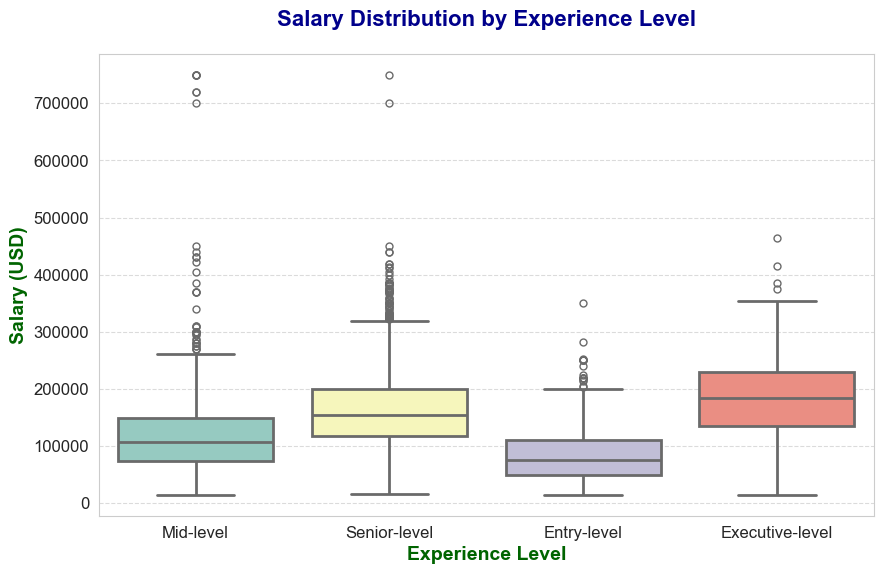

In [22]:
#Salary Distribution by Experience Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, palette="Set3", linewidth=2, fliersize=5)

# title and labels 
plt.title('Salary Distribution by Experience Level', fontsize=16, fontweight='bold', color='darkblue', pad=20)
plt.xlabel('Experience Level', fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel('Salary (USD)', fontsize=14, fontweight='bold', color='darkgreen')

# Adjust tick parameters
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for the y-axis 
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


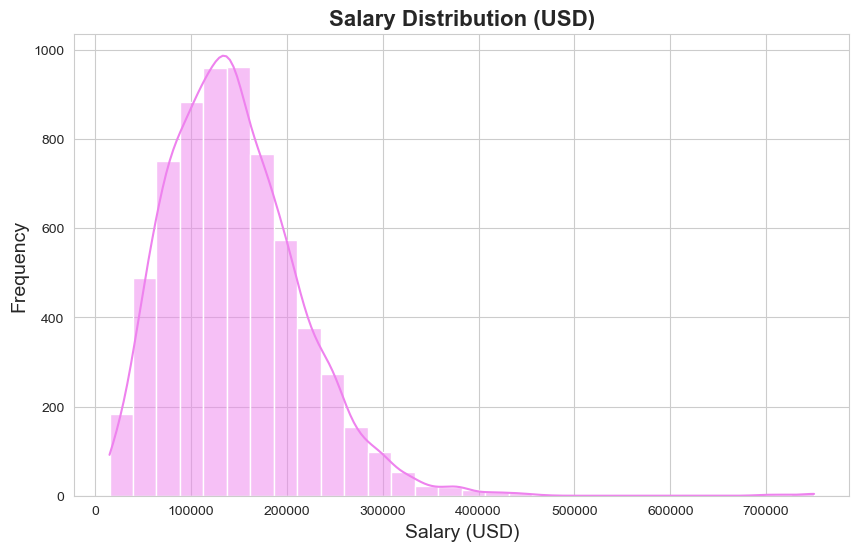

In [24]:
#Salary Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], bins=30, kde=True, color='violet')
plt.title('Salary Distribution (USD)', fontsize=16, fontweight='bold')
plt.xlabel('Salary (USD)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


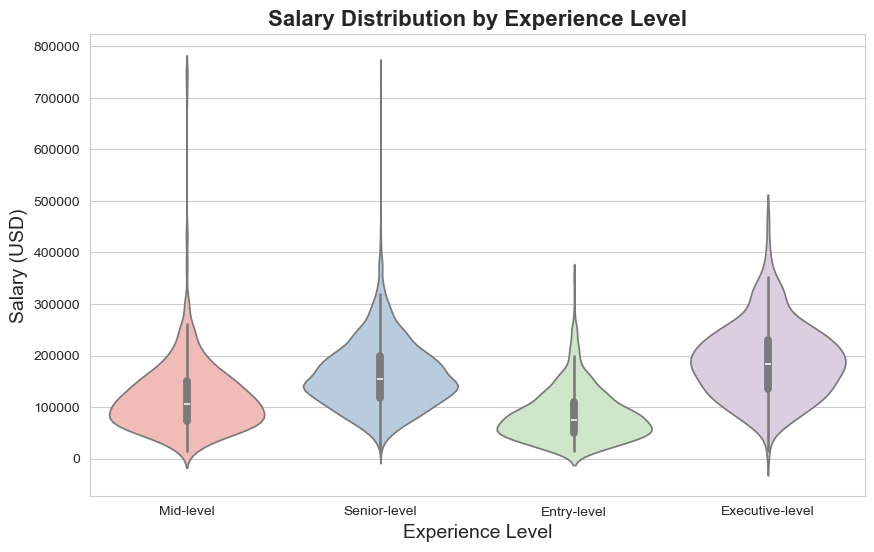

In [25]:
#Salary Distribution by Experience Level
plt.figure(figsize=(10, 6))
sns.violinplot(x='experience_level', y='salary_in_usd', data=df, palette='Pastel1')
plt.title('Salary Distribution by Experience Level', fontsize=16, fontweight='bold')
plt.xlabel('Experience Level', fontsize=14)
plt.ylabel('Salary (USD)', fontsize=14)
plt.show()

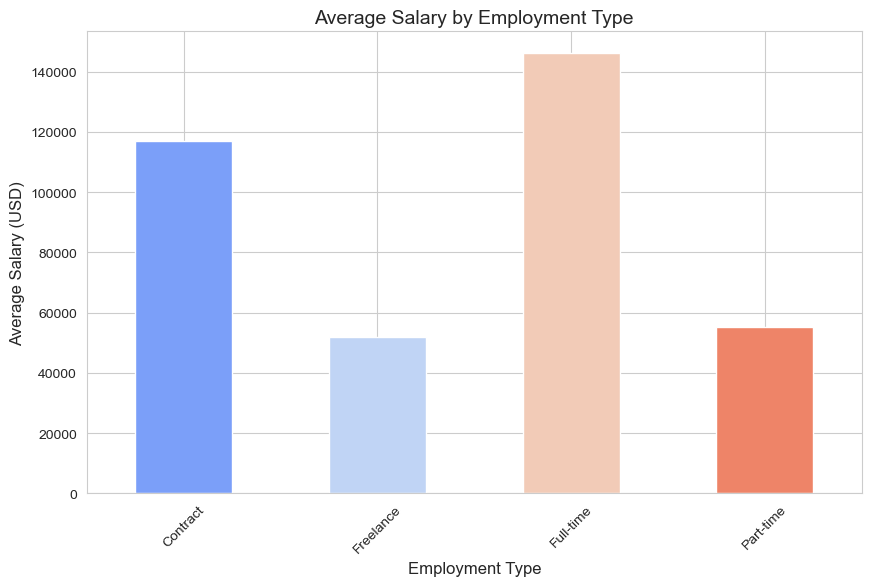

In [26]:
#Average Salary By employment Types
# Use a seaborn color palette 
colors = sns.color_palette("coolwarm", len(df['employment_type'].unique()))

# Employment type salary comparison 
df.groupby('employment_type')['salary_in_usd'].mean().plot(kind='bar', color=colors, figsize=(10, 6))

plt.title('Average Salary by Employment Type', fontsize=14)
plt.ylabel('Average Salary (USD)', fontsize=12)
plt.xlabel('Employment Type', fontsize=12)
plt.xticks(rotation=45)
plt.show()

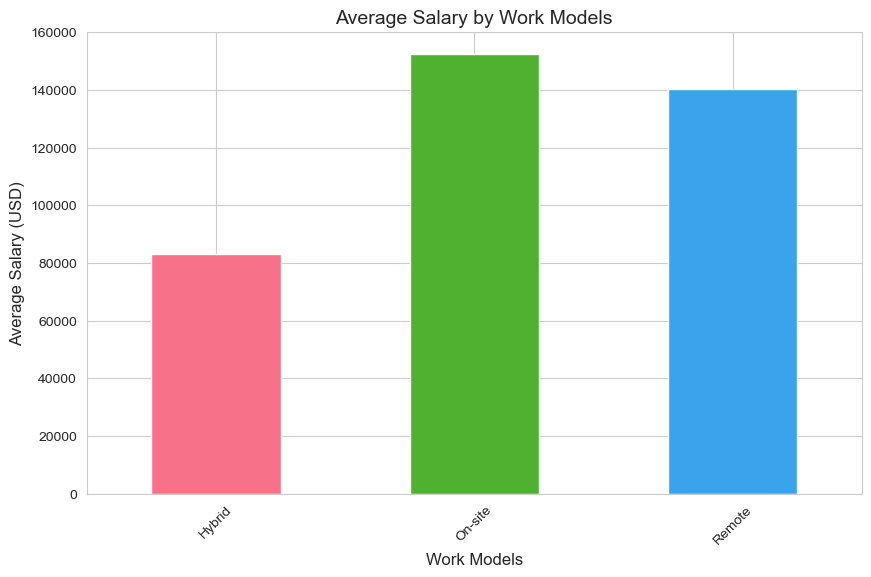

In [27]:
#Average Salary by Work Modality
colors = sns.color_palette("husl", len(df['work_models'].unique()))

# Work models salary comparison 
df.groupby('work_models')['salary_in_usd'].mean().plot(kind='bar', color=colors, figsize=(10, 6))

plt.title('Average Salary by Work Models', fontsize=14)
plt.ylabel('Average Salary (USD)', fontsize=12)
plt.xlabel('Work Models', fontsize=12)
plt.xticks(rotation=45)
plt.show()


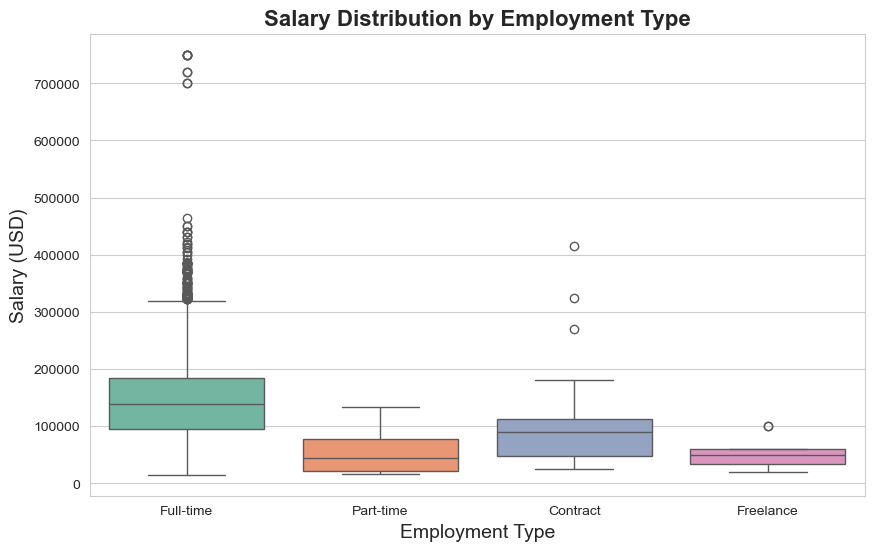

In [28]:
#Salary Distribution by Job Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='employment_type', y='salary_in_usd', data=df, palette='Set2')
plt.title('Salary Distribution by Employment Type', fontsize=16, fontweight='bold')
plt.xlabel('Employment Type', fontsize=14)
plt.ylabel('Salary (USD)', fontsize=14)
plt.show()

In [29]:
#Remote, Partial-Remote, Non-Remote Employee Distribution
colors = ['#2c4d8a', '#f5f5f6', '#bebebe', '#415a8a']

remote_type = ['Fully Remote', 'Partially Remote', 'No Remote Work']
remote_counts = df['work_models'].value_counts()

fig = px.bar(
    x=remote_type, 
    y=remote_counts.values, 
    color=remote_type,  
    text=remote_counts.values, 
    title='Remote Ratio Distribution',
    color_discrete_sequence=colors
)


fig.update_layout(
    xaxis_title="Remote Type", 
    yaxis_title="Count"
)

fig.show(renderer='iframe_connected')

In [30]:
#Remote Work Ratio By Year
colors = ['#2c4d8a', '#f5f5f6', '#bebebe', '#415a8a']

remote_year = df.groupby(['work_year', 'work_models']).size()

# 2020, 2021, 2022, 2023, 2024 
ratio_2020 = np.round(remote_year[2020].values / remote_year[2020].values.sum(), 2)
ratio_2021 = np.round(remote_year[2021].values / remote_year[2021].values.sum(), 2)
ratio_2022 = np.round(remote_year[2022].values / remote_year[2022].values.sum(), 2)
ratio_2023 = np.round(remote_year[2023].values / remote_year[2023].values.sum(), 2)
ratio_2024 = np.round(remote_year[2024].values / remote_year[2024].values.sum(), 2)

# Polar graph
fig = go.Figure()

categories = ['No Remote Work', 'Partially Remote', 'Fully Remote']
fig.add_trace(go.Scatterpolar(
    r = ratio_2020, 
    theta = categories, 
    fill = 'toself', 
    name = '2020 Remote Ratio',
    line=dict(color=colors[0])  
))

fig.add_trace(go.Scatterpolar(
    r = ratio_2021, 
    theta = categories,
    fill = 'toself', 
    name = '2021 Remote Ratio',
    line=dict(color=colors[1])  
))

fig.add_trace(go.Scatterpolar(
    r = ratio_2022, 
    theta = categories,
    fill = 'toself', 
    name = '2022 Remote Ratio',
    line=dict(color=colors[2])  
))

fig.add_trace(go.Scatterpolar(
    r = ratio_2023, 
    theta = categories,
    fill = 'toself', 
    name = '2023 Remote Ratio',
    line=dict(color=colors[3])  
))

fig.add_trace(go.Scatterpolar(
    r = ratio_2024, 
    theta = categories,
    fill = 'toself', 
    name = '2024 Remote Ratio',
    line=dict(color=colors[0])  
))

fig.update_layout(
    title='Remote Work Ratio by Year',
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )
    ),
    showlegend=True
)

fig.show(renderer='iframe_connected')